# Lineárna a logistická regresia

### Róbert Móro, Jakub Ševcech

IAU, 22.11.2018

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2018-19

## Pýtať sa môžete na http://slido.com#iau2018-w10

## Klasifikácia vs. regresia

### Klasifikácia
* Predikovaná premenná je kvalitatívna = kategorická (má množinu hodnôt)
* Napr. klasifikácia mailov spam/nie spam

### Regresia
* Predikovaná premenná je kvantitatívna = číselná (reálne číslo z intervalu)
* Napr. predikcia ceny bytov

## Dnes sa pozrieme na 2 algoritmy (prístupy strojového učenia)

### Lineárna regresia - regresia

### Logistická regresia - klasifikácia

<img src="img/excited.jpg" alt="Neviem sa dočkať" style="margin-left: auto; margin-right: auto; width:800px"/>

# Lineárna regresia

Používame vtedy, keď chceme:

Porozumieť vzťahu medzi závislou a nezávislými premennými

Predikovať hodnoty závislej premennej na základe hodnôt nezávislých premenných

## Jednoduchá lineárna regresia

Predpokladá lineárnu závislosť medzi závislou (predikovanou) a nezávislou premennou.

$$ Y = \beta_0 + \beta_1X $$

$Y$ - závislá premenná

$X$ - nezávislá premenná

$\beta_0$ - konštanta (intercept)

$\beta_1$ - sklon krivky

## Parametre určujeme pomocou metódy najmenších štvorcov

Angl. *(ordinary) least squares*

<img src="img/least-squares.png" alt="Metóda najmenších štvorcov" style="margin-left: auto; margin-right: auto; width:400px"/>

Zdroj: https://en.wikipedia.org/wiki/File:Least_Squares.png

## Metóda najmenších štvorcov

Zostatok (residual): $e_i = y_i - \hat{y_i} = y_i - \hat{\beta_0} - \hat{\beta_1}x_i$

Residual sum of squares: $RSS = \sum_i^n{e_i^2}$

Minimalizujeme chybu (RSS):

$$ \frac{\partial RSS}{\partial \hat{\beta_0}} = 0 \,\,\,\,\,\,\,\, \frac{\partial RSS}{\partial \hat{\beta_1}} = 0 $$

## Riešenie pre jednoduchý lineárny model:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n{(x_i-\overline{x})(y_i-\overline{y})}}{\sum_{i=1}^n{(x_i-\overline{x})}} $$

$$ \hat{\beta_0} = \overline{y}-\hat{\beta_1}\overline{x} $$

## Na overenie parametrov modelu využívame štatistické testovanie hypotéz

Nulová hypotéza ($H_0$):
* Konštanta $\beta_0 = 0$
* Sklon krivky $\beta_1 = 0$, t. j. medzi X a Y nie je žiadny vzťah

## Metrikou presnosti predikcie je štandardná chyba odhadu (residual standard error, RSE)

$$ RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n{(y_i-\hat{y_i})^2}} $$

Meraná je v jednotkách premennej Y.

Častejšie sa však stretnete s **MSE (Mean Squared Error)**, resp. s **RMSE (Root Mean Squared Error)**. 

Platí, že $RMSE = RSE$, $RMSE = \sqrt{MSE}$ 

## Zaujíma nás tiež, aké percento variability v dátach je vysvetlené použitými nezávislými premennými

$$ R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS} $$

kde $TSS$ (total sum of squares) = $\sum{(y_i-\overline{y})}$

$R^2$ je nezávislé od jednotiek Y. Nadobúda hodnoty z intervalu $<0,1>$.

## Lineárna regresia v Pythone

`statsmodels`: http://www.statsmodels.org/stable/regression.html

`scikit-learn`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
# Priklad prevzaty z https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

from sklearn import datasets
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = datasets.load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

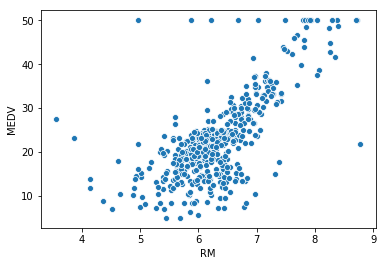

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

# MEDV (target): Median value of owner-occupied homes in $1000's
# RM: average number of rooms per dwelling
sns.scatterplot('RM', 'MEDV', data=df)

In [3]:
y = df.MEDV
X = df.RM
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        15:19:12   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Iný zápis pomocou formuly

In [4]:
from statsmodels.formula.api import ols

model = ols("MEDV ~ RM", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        15:19:12   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lineárna regresia v `scikit-learn`

In [5]:
from sklearn.linear_model import LinearRegression

y = df.MEDV
X = df[['RM']]

lm = LinearRegression().fit(X, y)
print("R^2: %f" % lm.score(X, y))
print(lm.intercept_, lm.coef_)

R^2: 0.483525
-34.67062077643857 [9.10210898]


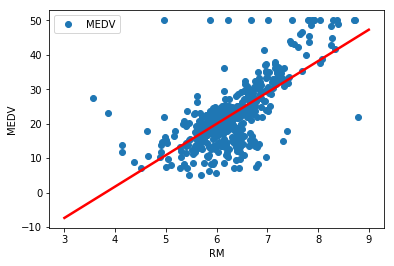

In [6]:
ax = df.plot(x="RM", y="MEDV", style="o")
ax.set_ylabel("MEDV")

rm = df[["RM"]].values
xs = range(int(np.min(rm[:,0])), int(np.max(rm[:,0])+2))
ys = [lm.predict(x) for x in xs]
ax.plot(xs, ys, 'r', linewidth=2.5)

## Viacnásobná lineárna regresia

Zovšeobecnenie jednoduchej lineárnej regresie pre viacero premenných.

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon $$

## Pri viacnásobnej regresii nás väčšinou zaujímajú odpovede na tieto otázky

Je aspoň jeden prediktor užitočný pri predikcii Y?
* Štatistické testovanie

Pomáhajú všetky prediktory vysvetliť Y alebo len ich podmnožina?
* Výber atribútov

## Pri viacnásobnej regresii nás väčšinou zaujímajú odpovede na tieto otázky

Ako dobre model fituje dáta?
* RSE, $R^2$

Ak máme hodnoty premenných, akú odpoveď (predikciu) máme očakávať, a aká je jej presnosť?
* Intervaly istoty, predikčné intervaly

## Pri viacnásobnej regresii testujeme, či je aspoň jeden koeficient nenulový

$H_0: \beta_1 = \beta_2 = \dots = \beta_p = 0$

$$ F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)} $$

In [7]:
model = ols("MEDV ~ RM + LSTAT", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          7.01e-112
Time:                        15:19:13   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y = df.MEDV
X = df[df.columns.difference(['MEDV'])]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          6.95e-135
Time:                        15:19:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
B              0.0094      0.003      3.500      0.001       0.004       0.015
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
RM             3.8048      0.418      9.102      0.000       2.983       4.626
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Pozor: $R^2$ monotónne stúpa so zvyšujúcim sa počtom prediktorov (RSS zas klesá)

In [9]:
from sklearn import preprocessing

y = df.MEDV
X = df[['RM']]

X1 = sm.add_constant(X)
model1 = sm.OLS(y, X1).fit()

X2 = sm.add_constant(preprocessing.PolynomialFeatures(2).fit_transform(X))
model2 = sm.OLS(y, X2).fit()

X3 = sm.add_constant(preprocessing.PolynomialFeatures(3).fit_transform(X))
model3 = sm.OLS(y, X3).fit()

print(model1.rsquared, model2.rsquared, model3.rsquared)

0.48352545599133423 0.5484256373971057 0.5612257226355395


Môžeme použiť upravenú hodnotu Adjusted-$R^2$:

$$ Adjusted R^2 = 1 - \frac{RSS / (n-p-1)}{TSS / (n-1)} $$

Lepšie je však porovnávať rôzne lineárne modely pomocou MSE (resp. RMSE) vypočítanej nad **testovacími (alebo validačnými) dátami**.

## Kvalitatívne prediktory (nominálne premenné)

One-hot encoding = vytvorenie $k-1$ zástupných premenných. 

Dostaneme pre každú hodnotu nominálnej premennej iný lineárny model (posunutý o konštantu):

Keď $x_i = 0$: $ y_i = \beta_0 + \beta_1x_i + \epsilon_i = \beta_0 + \epsilon_i$ 

Keď $x_i = 1$: $ y_i = \beta_0 + \beta_1x_i + \epsilon_i = \beta_0 + \beta_1 + \epsilon_i$

In [10]:
df['CRIM_CAT'] = df['CRIM'] > df['CRIM'].median()

model = ols("MEDV ~ RM + CRIM_CAT", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     259.6
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.51e-78
Time:                        15:19:13   Log-Likelihood:                -1660.8
No. Observations:                 506   AIC:                             3328.
Df Residuals:                     503   BIC:                             3340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -31.1831      2.682    -11.629      0.000     -36.452     -25.915
CRIM_CAT[T.True]    -2.9062      0.582     -4.994      0.000      -4.049      -1.763
RM                   8.7784      0.415     21.178      0.000       7.964       9.593
==============================================================================
Omnibus:                      160.331   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              997.456
Skew:                           1.230   Prob(JB):                    2.54e-217
Kurtosis:                       9.423   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

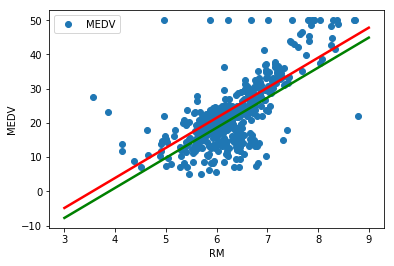

In [11]:
ax = df.plot(x="RM", y="MEDV", style="o")
ax.set_ylabel("MEDV")

rm = df[["RM", "CRIM_CAT"]].values
xs = range(int(np.min(rm[:,0])), int(np.max(rm[:,0])+2))

no_crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
no_crim.RM = xs
no_crim.CRIM_CAT = False
ys1 = model.predict(no_crim)

crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
crim.RM = xs
crim.CRIM_CAT = True
ys2 = model.predict(crim)

ax.plot(xs, ys1, 'r', xs, ys2, 'g', linewidth=2.5)

## Interakcie medzi prediktormi

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon $$

In [12]:
model = ols("MEDV ~ RM * CRIM_CAT", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     186.4
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.36e-81
Time:                        15:19:13   Log-Likelihood:                -1650.9
No. Observations:                 506   AIC:                             3310.
Df Residuals:                     502   BIC:                             3327.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -48.2038      4.617    -10.442      0.000     -57.274     -39.134
CRIM_CAT[T.True]       21.8475      5.545      3.940      0.000      10.952      32.743
RM                     11.4402      0.719     15.905      0.000      10.027      12.853
RM:CRIM_CAT[T.True]    -3.9141      0.872     -4.488      0.000      -5.628      -2.201
==============================================================================
Omnibus:                      162.045   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.652
Skew:                           1.270   Prob(JB):                    1.49e-204
Kurtosis:                       9.170   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

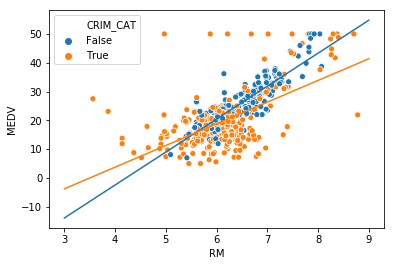

In [13]:
sns.scatterplot('RM', 'MEDV', data=df, hue='CRIM_CAT')

rm = df[["RM", "CRIM_CAT"]].values
xs = range(int(np.min(rm[:,0])), int(np.max(rm[:,0])+2))

no_crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
no_crim.RM = xs
no_crim.CRIM_CAT = False
ys_false = model.predict(no_crim)

crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
crim.RM = xs
crim.CRIM_CAT = True
ys_true = model.predict(crim)

sns.lineplot(xs, ys_false)
sns.lineplot(xs, ys_true)

## Čo ak závislosť medzi prediktorom a predikovanou premennou nie je lineárna?

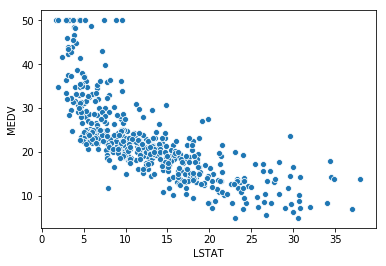

In [14]:
sns.scatterplot('LSTAT', 'MEDV', data=df)

Lineárny model môžeme rozšíriť o polynomiálnu transformáciu, resp. o iné typy transformácií (logaritmus, odmocnina, ...)

In [15]:
lm1 = ols("MEDV ~ LSTAT", df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           5.08e-88
Time:                        15:19:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm2 = ols("MEDV ~ np.log(LSTAT)", df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          9.28e-122
Time:                        15:19:14   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

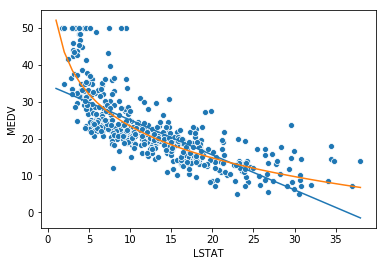

In [17]:
sns.scatterplot('LSTAT', 'MEDV', data=df)

lstat = df[["LSTAT"]].values
xs = range(int(np.min(lstat[:,0])), int(np.max(lstat[:,0])+2))

data = pd.DataFrame(columns=['LSTAT'])
data.LSTAT = xs

ys1 = lm1.predict(data)
ys2 = lm2.predict(data)

sns.lineplot(xs, ys1)
sns.lineplot(xs, ys2)

## Diagnostika lineárneho modelu

In [18]:
from statsmodels.graphics.regressionplots import plot_regress_exog

fig = plt.figure(figsize=(12,4))
print(plot_regress_exog(lm1, 'LSTAT', fig=fig))

NameError: name 'plt' is not defined

## Ďalšia diagnostika (na čo si dať pozor)

Pozorovania s vysokým vplyvom, vychýlené hodnoty, kolinearita, nekonštantná variancia chýb (heteroscedascita), korelované chyby, ...

https://www.statsmodels.org/stable/diagnostic.html

http://www.statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

## Lineárna regresia v praxi

<img src="img/seer.jpg" alt="Veštenie z gule" style="margin-left: auto; margin-right: auto; width:600px"/>

### Predikcia: IFP Kalkulačka hodnoty bytov

http://www.institutfinancnejpolitiky.sk/kalkulacky/nehnutelnosti/

Atribúty ako obec, ulica, obytná plocha, balkón, poschodie, a pod.

### Porozumenie vzťahu: Kto volil Kotlebu?

https://dennikn.sk/402526/obraz-kotlebovej-podpory-zatial-velmi-povrchny-nieco-dolezite-unika/?cst=1324f9abaa007e30565f85fa6ace469f92e99f9f

Dáta z: výsledkov volieb, sčítania obyvateľstva, atlas rómskych komunít, štatistiky nezamestnanosti

# Logistická regresia

## Mohli by sme na klasifikáciu použiť lineárnu regresiu?

*Áno* - majme povedzme dve triedy (0/1); zvolíme si hranicu, dokedy predikujeme 0, a odkedy už predikujeme 1.

Problém, ako interpretovať, keď nám vráti hodnotu menšiu ako 0 alebo väčšiu ako 1.

Nebude fungovať pre viacero tried (napr. 0, 1, 2) - zaniesli by sme umelo poradie, ktoré vo väčšine prípadov nemá zmysel.

### Aj na klasifikáciu teda môžeme použiť regresnú metódu, ale chceli by sme funkciu, ktorá vracia hodnoty z intervalu <0,1> 

... *Logistická regresia*

## Logistická funkcia


$$p(Y=1|X) = p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}$$

<img src="img/logistic-curve.svg" alt="Logistická krivka" style="margin-left: auto; margin-right: auto; width:600px"/>

Zdroj: https://en.wikipedia.org/wiki/Logistic_function

### Úpravou funkcie dostávame:

$$ \frac{p(X)}{1-p(X)} = e^{\beta_0+\beta_1X} $$

kde ľavá strana predstavuje šancu (angl. *odds*).

$$ \log{\left(\frac{p(X)}{1-p(X)}\right)} = \beta_0+\beta_1X $$

kde výraz na ľavej strane sa označuje ako *log-odds* alebo *logit*.

## Trénovanie modelu = odhad koeficientov $\hat{\beta_i}$

Algoritmus *Maximum Likelihood Estimation (MLE)* - cieľom je nájsť také hodnoty koeficientov, aby pozorovania s triedou 0 mali pravdepodobnosť čo najbližšiu nule a naopak. Optimalizuje sa nasledovná funkcia:

$$ l(\beta_0, \beta_1) = \prod_{i:y_i=1}{p(x_i)} \prod_{i':y_{i'}=0}{(1-p(x_{i'}))} $$

## Viacnásobná logistická regresia

Zovšeobecnenie analogické k tomu, ako to bolo pri lineárnej regresii.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [ ]:
print(label_names)

In [ ]:
df = pd.DataFrame(features)
df.columns = feature_names
df['target'] = labels
df.head()

In [ ]:
df.describe()

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(df[feature_names], df['target'], test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
logit = LogisticRegression()
logit.fit(train, train_labels)
preds = logit.predict(test)
preds[:10]

In [ ]:
logit.coef_

In [ ]:
logit.score(test, test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(test_labels, preds)

In [ ]:
precision_score(test_labels, preds)

In [ ]:
recall_score(test_labels, preds)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds, digits=5))

In [ ]:
from sklearn.metrics import roc_curve, auc

probs = logit.predict_proba(test)

fpr, tpr, _ = roc_curve(test_labels, probs[:, 1]) # z pravdepodobnosti vypocitam body roc krivky
roc_auc = auc(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', # nahodny klasifikator by spravil rovnu ciaru
         label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, probs[:, 1])

### Logarithmic loss (Logloss)

Používa sa v prípade, ak máme algoritmus, ktorý predikuje pravdepodobnosť toho, že nejaké pozorovanie patrí do triedy (ako napr. logistická regresia). Vieme vtedy penalizovať model proporčne k tomu, ako si je istý svojou predikciou.

Penalizácia za nesprávne zaradenie do triedy závisí od toho, ako veľmi sme si istí, že to tam patrí. 

$$log loss = -\frac{1}{N}\sum_{i=1}^N {(y_i\log(p_i) + (1 - y_i)\log(1 - p_i))}$$

In [ ]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
results = cross_val_score(model, train, train_labels, cv=10, scoring='neg_log_loss')
(results.mean(), results.std()) # cim mensia hodnota, tym lepsie

## Klasifikácia do viacerých tried (multiclass classification)

V prípade, že mám viac ako 2 triedy. Nemýliť si s multi-label klasifikáciou (pri nej jedno pozorovanie môžem priradiť naraz do viacerých tried).

##  Ako zovšeobecniť binárny klasifikátor na klasifikáciu do viacerých tried?

### One-vs-rest (one-vs-all)

Trénujeme *k* klasifikátorov, v ktorých pozorovanie z *i*-tej triedy sú považované za pozitívne, pozorovania z ostatných za negatívne. Pri predikcii zoberieme výsledok klasifikátora s najvyššou istotou.

### One-vs-one

Trénujeme *k*(*k*-1)/2 klasifikátorov pre všetky dvojice tried. Pri predikcii zoberiem výsledok hlasovania všetkých natrénovaných klasifikátorov (triedu, ktorá vyjde najčastejšie).

Pre viac info pozrite: https://en.wikipedia.org/wiki/Multiclass_classification

## Vzťah medzi logistickou regresiou a neurónovými sieťami

<img src="img/logit-neural.png" alt="Schéma logistickej funkcie" style="margin-left: auto; margin-right: auto; width:800px"/>

Zdroje:

https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html

https://stats.stackexchange.com/questions/43538/difference-between-logistic-regression-and-neural-networks

## Čo si odniesť z prednášky

Nezavrhujte jednoduché modely
* Prekvapivo úspešné na reálnych dátach
* Častou výhodou nižšie výpočtové nároky a jednoduchšia interpretovateľnosť

Pozor na kliatbu dimenzionality (príliš veľa prediktorov) 
* Nabudúce sa preto ešte pozrieme na **Výber atribútov**

## Zdroje

G. James, D. Witten, T. Hastie, R. Tibshirani (2017). Introduction to Statistical Learning with Applications in R. https://www-bcf.usc.edu/~gareth/ISL/ (hlavne kap. 3 a 4)

V Pythone: 
* https://github.com/JWarmenhoven/ISLR-python 
* https://github.com/sujitpal/statlearning-notebooks
* https://github.com/mscaudill/IntroStatLearn

<img src="img/linear-regression-xkcd.png" alt="Lineárna regresia na XKCD" style="margin-left: auto; margin-right: auto; width:800px"/>

Zdroj: https://xkcd.com/1725/